In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [3]:
df = yf.download('AAPL', start='2012-01-01', end='2023-07-15')

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482929,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550010,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689342,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821991,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801657,394024400
...,...,...,...,...,...,...
2023-07-10,189.259995,189.990005,187.039993,188.610001,188.610001,59922200
2023-07-11,189.160004,189.300003,186.600006,188.080002,188.080002,46638100
2023-07-12,189.679993,191.699997,188.470001,189.770004,189.770004,60750200


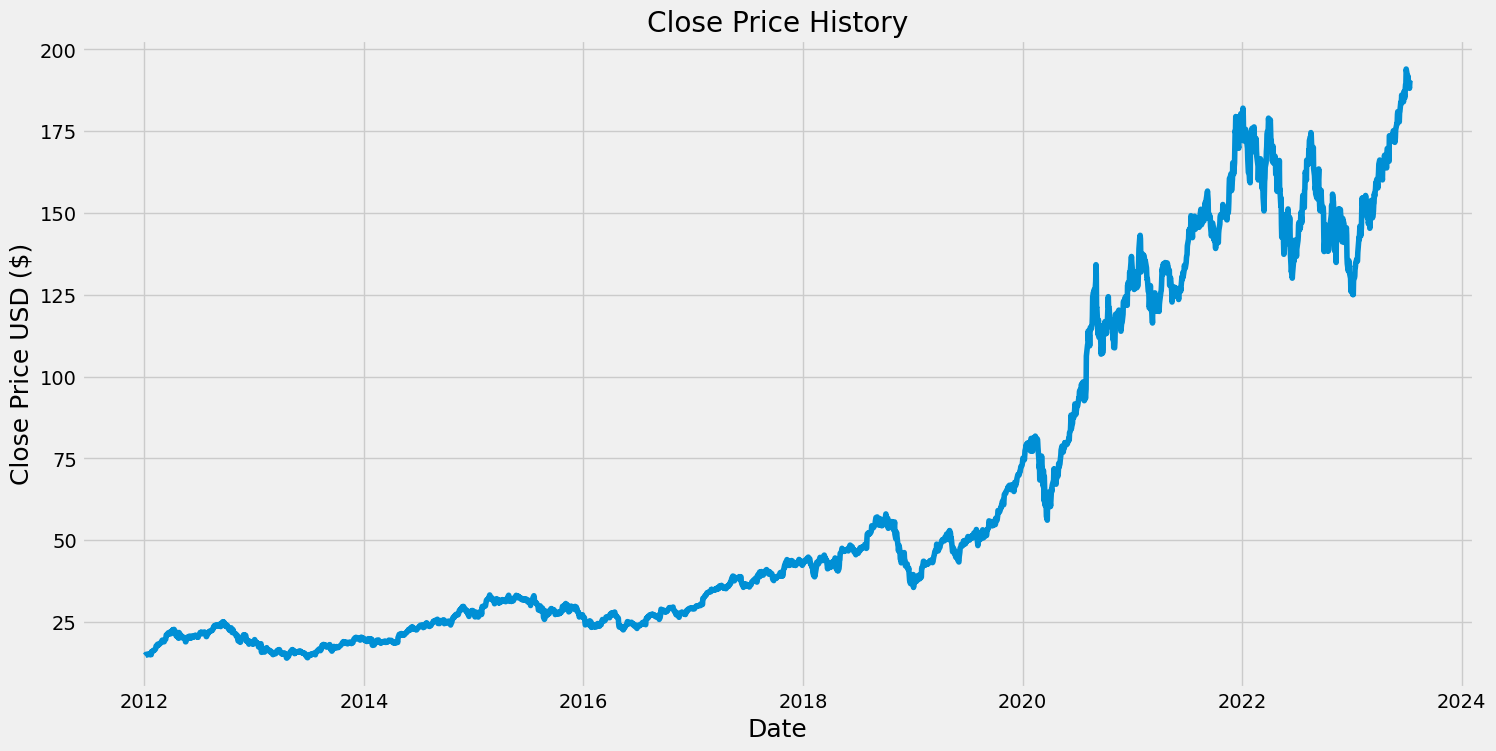

In [4]:
#visualising the price of stock w.r.t to date.
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()



In [5]:
data = df.filter(['Close'])
dataset = data.values #converting to numpy array

training_data_len = math.ceil(len(dataset) * .8)

print(data)

print(dataset)

print(f'The length of training data = {training_data_len}')


                 Close
Date                  
2012-01-03   14.686786
2012-01-04   14.765714
2012-01-05   14.929643
2012-01-06   15.085714
2012-01-09   15.061786
...                ...
2023-07-10  188.610001
2023-07-11  188.080002
2023-07-12  189.770004
2023-07-13  190.539993
2023-07-14  190.690002

[2901 rows x 1 columns]
[[ 14.6867857 ]
 [ 14.76571369]
 [ 14.92964268]
 ...
 [189.77000427]
 [190.53999329]
 [190.69000244]]
The length of training data = 2321


In [6]:
#preprocessing - MinMax Normalization

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00410663],
       [0.00454506],
       [0.00545566],
       ...,
       [0.9766696 ],
       [0.98094678],
       [0.98178006]])

In [7]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00410663, 0.00454506, 0.00545566, 0.00632262, 0.0061897 ,
       0.00648927, 0.00635238, 0.00612225, 0.00580879, 0.00677891,
       0.00765381, 0.007384  , 0.005906  , 0.00731654, 0.00592783,
       0.01113551, 0.01073279, 0.01125851, 0.01239527, 0.01308368,
       0.01302615, 0.01281387, 0.01371852, 0.0145696 , 0.01553377,
       0.01709112, 0.02036253, 0.02041213, 0.02223333, 0.02359427,
       0.02125528, 0.02215596, 0.02213811, 0.02466359, 0.0243045 ,
       0.0249691 , 0.02616339, 0.026828  , 0.02874244, 0.0301371 ,
       0.03053983, 0.03068069, 0.02829607, 0.02772074, 0.02780605,
       0.03004784, 0.03067871, 0.0320337 , 0.03522774, 0.03948911,
       0.03869159, 0.03869357, 0.04177454, 0.04273871, 0.04205228,
       0.04142538, 0.04077268, 0.04294106, 0.04442897, 0.04505191])]
[0.043512415186967204]



In [8]:
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(2261, 60, 1)

In [9]:
#creating architecture of the model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))




In [10]:
 model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2261/2261 [==============================] - 35s 14ms/step - loss: 6.4177e-04


In [12]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [13]:
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [14]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

19/19 [==============================] - 1s 12ms/step


In [15]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)

rmse

5.391717963383115

C:\Users\sharm\AppData\Local\Temp\ipykernel_13688\557013566.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


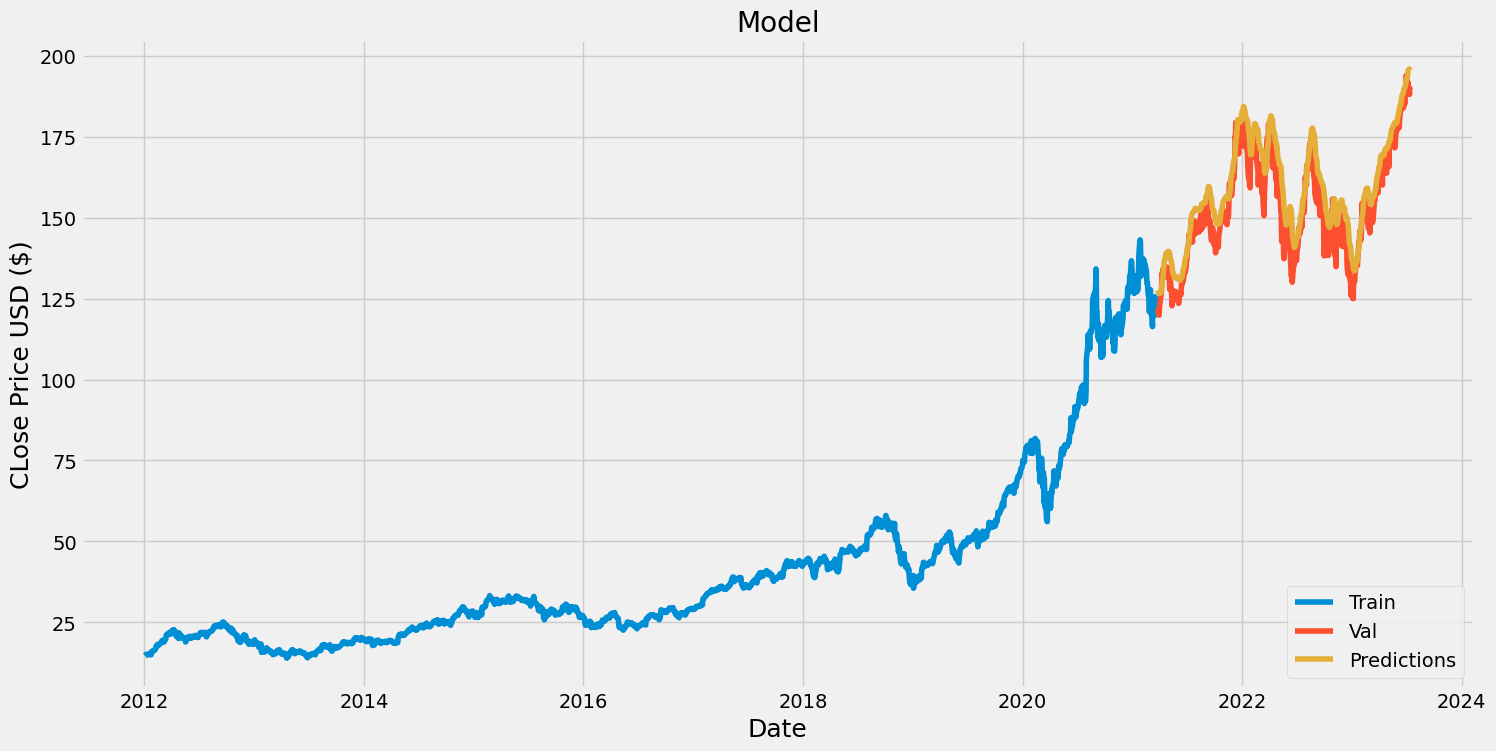

In [16]:
#plotting actual values and the prediction ones.
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('CLose Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [17]:
valid

,Close,Predictions
Date,,
2021-03-25,120.589996,127.553017
2021-03-26,121.209999,127.286209
2021-03-29,121.389999,127.070267
2021-03-30,119.900002,126.918243
2021-03-31,122.150002,126.667564
...,...,...
2023-07-10,188.610001,195.925995
2023-07-11,188.080002,195.910629
2023-07-12,189.770004,195.659866


In [20]:
apple_quote = yf.download('AAPL', start='2012-01-01', end='2023-07-15')

new_df = apple_quote.filter(['Close'])

last_60_days = new_df[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)

X_test = []

X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 21ms/step
[[195.407]]


In [32]:
apple_quote = yf.download('AAPL', start='2023-07-17', end='2023-07-18')

apple_quote

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-17,191.899994,194.320007,191.809998,193.990005,193.990005,50520200
